In [31]:
from utils_ConConCor import *
from utils_SABIO import *
from utils_nlp import *

import numpy as np
import numpy.random as rand

from collections import Counter, defaultdict

import os
import re

import pymannkendall as mk


In [2]:
def subset(scores, found_list):
    def get_k(k):
        return scores[(found_list.apply(len) >= k)]
    return get_k
    
def get_samples_k(scores, found_list, k):
    n = len(scores)
    samples = scores[(found_list.apply(len) > k)]
    return samples.sample(min(3000, len(samples)))

def get_means_k(scores, found_list, ks):
    return np.asarray([get_samples_k(scores, found_list, k).mean() for k in ks])

In [3]:
ccc = get_CCC_DF()
ccc_terms = ccc.target.unique()

nmvw = get_NMvW_DF().sort_index()
nmvw["Segmented"] = pd.read_csv("nmvw_segmented2.csv").set_index("ID").Texts.fillna("")

sabio_scores = pd.read_csv("SABIO_scores_10_08_2022.csv").set_index("id")

In [4]:
txts = nmvw.Texts

---


In [5]:
all_counts = Counter(w for txt in txts for w in txt.split() if len(w) > 1)

def draw_rand(terms, counts, plusminus=5):
    freq_groups = defaultdict(list)
    for w, c in counts.items():
        freq_groups[c].append(w)
        
    rand_terms = []
    for w in terms:
        cur_c = counts[w]
        if cur_c > 0:
            cur_choices = [ls for c_ in range(cur_c-plusminus, cur_c+plusminus) 
                             for ls in freq_groups[c_]]
            rand_terms.append(rand.choice(cur_choices))
    return rand_terms

In [26]:
import string

rnd = draw_rand(ccc_terms, all_counts, plusminus=100)
rnd = [s.translate(s.maketrans("", "", string.punctuation)) for s in rnd]
rand_found, rand_forms = find_lemmata(rnd, txts, 
                     parallel=True, only_whole_words=True, return_forms=True)

getting wordforms from INT (internet up?): 100%|█| 66/66 [00:15<00:00,  4.22


Pandas Apply:   0%|          | 0/146694 [00:00<?, ?it/s]

In [27]:
rand_forms

{'131317',
 '133609',
 '14081963',
 '151',
 '16',
 '165353',
 '2003',
 '3491b',
 '57340',
 '58x78',
 '79',
 '92941',
 'aandenken',
 'adams',
 'adamsche',
 'aendachte',
 'aendenc',
 'aendencke',
 'aendencken',
 'aendenckende',
 'aendencket',
 'aendenken',
 'aendenket',
 'aendocht',
 'aendochte',
 'aendochten',
 'aengedocht',
 'andenken',
 'ashinaga',
 'ayn',
 'batak',
 'bataks',
 'beuolen',
 'beval',
 'bevalen',
 'bevalt',
 'beveel',
 'beveelde',
 'beveele',
 'beveelen',
 'beveelende',
 'beveelt',
 'beveilt',
 'bevele',
 'bevelen',
 'bevelt',
 'bevolen',
 'bevolenen',
 'bevoolen',
 'bevã©len',
 'bovebnkant',
 'citruskwekerij',
 'couleurende',
 'delff',
 'delft',
 'delfte',
 'ernaastgelegen',
 'expeditie',
 'expeditien',
 'gagah',
 'gekleurd',
 'gekleurde',
 'geluksmunt',
 'gemaalin',
 'gemaelin',
 'gemalin',
 'gemalinne',
 'gemalinnen',
 'gewijd',
 'gewijde',
 'gewonden',
 'ghewonden',
 'goats',
 'hawaiian',
 'hieronymus',
 'homoede',
 'homoet',
 'homoets',
 'hoochmoet',
 'hoofdsteeg',


In [28]:
rand_found.apply(len).sum()

34549


 ContentLengthEnginev0


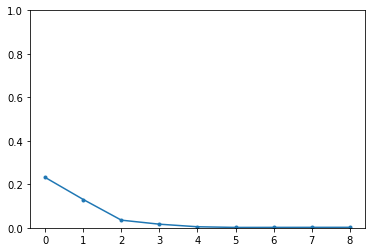

Mann_Kendall_Test(trend='decreasing', h=True, p=0.01648865672767008, z=-2.39791576165636, Tau=-0.6666666666666666, s=-24.0, var_s=92.0, slope=-0.011483902466361148, intercept=0.050698643040800045)


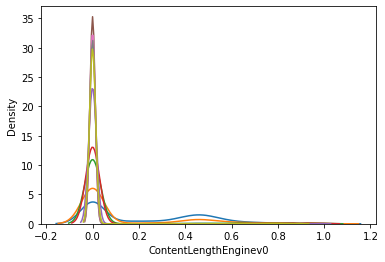


 VocabularyEnginev0


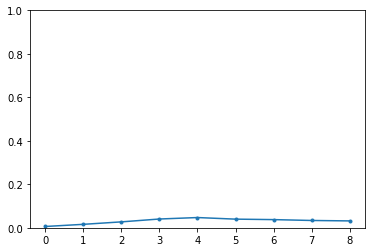

Mann_Kendall_Test(trend='no trend', h=False, p=0.46551216987418664, z=0.7298004491997617, Tau=0.2222222222222222, s=8.0, var_s=92.0, slope=0.0027767999229551883, intercept=0.022591650882891896)


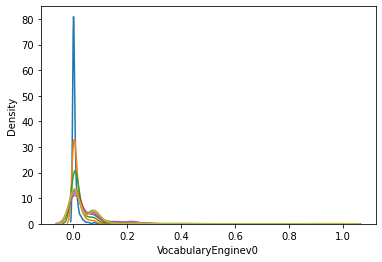


 TypicalityEnginev0


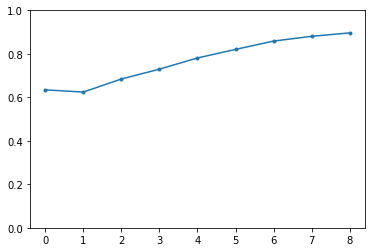

Mann_Kendall_Test(trend='increasing', h=True, p=0.0005806665459491267, z=3.440487831941734, Tau=0.9444444444444444, s=34.0, var_s=92.0, slope=0.03806629132139354, intercept=0.6287616909545524)


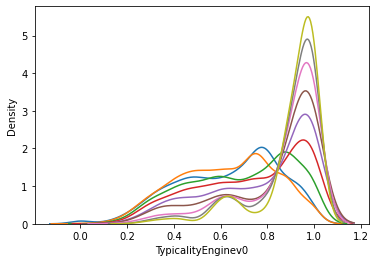


 RandomEnginev0


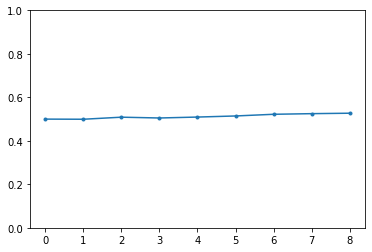

Mann_Kendall_Test(trend='increasing', h=True, p=0.0012293849189448647, z=3.2319734178846593, Tau=0.8888888888888888, s=32.0, var_s=92.0, slope=0.0037351947340283354, intercept=0.49434832058995304)


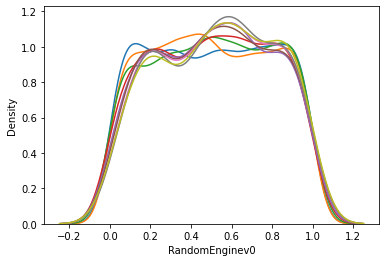


 PMIEnginev0


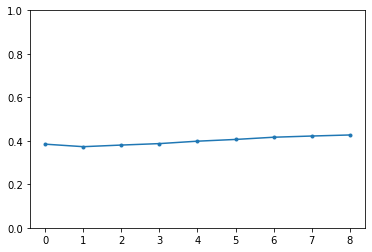

Mann_Kendall_Test(trend='increasing', h=True, p=0.0012293849189448647, z=3.2319734178846593, Tau=0.8888888888888888, s=32.0, var_s=92.0, slope=0.007791819635586427, intercept=0.36718817169462115)


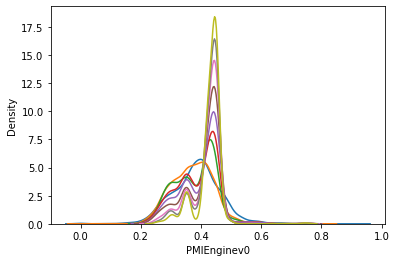

In [35]:
ks = range(9)

for engine in sabio_scores.columns:
    sample_ls = [get_samples_k(sabio_scores[engine], rand_found, i) for i in ks]

    means = [np.mean(s) for s in sample_ls]
    
    print("\n", engine)
    
    plt.plot(means, ".-")
    plt.ylim((0, 1)); plt.show()
    
    print(mk.original_test(means))

    for i, s in enumerate(sample_ls):
        sns.kdeplot(s, label=str(i))
    plt.show()